# Evaluation matrices (multiclass classification)


## Setting up
- Iris data
- 3 classes
- 2 features
- Logistic regression

In [178]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Iris data
dataObj = load_iris()

# X data (features)
X = dataObj.data[:, [1, 2]]

# y data
y = dataObj.target

print(np.unique(y))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Constructing a pipeline object
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=0, C=1))])

pipe_lr.fit(X_train, y_train)

[0 1 2]


Pipeline(steps=[('scl', StandardScaler()),
                ('clf', LogisticRegression(C=1, random_state=0))])

## Confusion matrix

In [179]:
from sklearn.metrics import confusion_matrix

y_pred = pipe_lr.predict(X_test)
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]], dtype=int64)

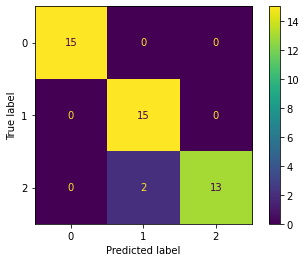

In [180]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(estimator=pipe_lr, X=X_test, y_true=y_test)  
plt.show()  

Compute class-wise (default) multilabel confusion matrix to evaluate the accuracy of a classification, and output confusion matrices for each class or sample.

Note that I used `np.flip` to reverse the order of the element to make the output consistent with what we used previously.

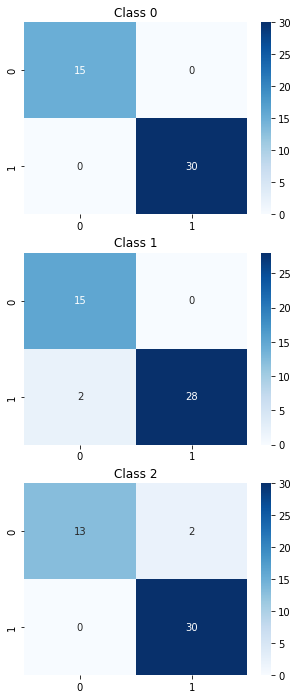

In [181]:
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

#Multilabel confusion matrix
matrices = multilabel_confusion_matrix(y_true=y_test, y_pred=y_pred)

nc = np.unique(y).shape[0]
fig, axs = plt.subplots(nc, 1, figsize=(5,nc*4))
for idx, m in enumerate(matrices):
    sns.heatmap(np.flip(m), annot=True, cmap='Blues', ax=axs[idx])
    axs[idx].set_title(f'Class {idx}')


## Accuracy, Precision, Recall, F1

`Support` is the number of true instances for each label.

#### Summary using `classification_report`

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,  digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     0.8824    1.0000    0.9375        15
           2     1.0000    0.8667    0.9286        15

    accuracy                         0.9556        45
   macro avg     0.9608    0.9556    0.9554        45
weighted avg     0.9608    0.9556    0.9554        45



#### Using `score` functions

Calculate average

In [183]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
ACC = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy:{ACC:6.3f}")
print('-'*20)
# Precision
for average in ['macro', 'weighted', 'micro']:
    PRE = precision_score(y_true=y_test, y_pred=y_pred, average=average)
    print(f"Precision ({average}):{PRE:6.3f}")
print('-'*20)
# Recall
for average in ['macro', 'weighted', 'micro']:
    REC = recall_score(y_true=y_test, y_pred=y_pred, average=average)
    print(f"Recall ({average}):{REC:6.3f}")
print('-'*20)
# F1
for average in ['macro', 'weighted', 'micro']:
    F1 = f1_score(y_true=y_test, y_pred=y_pred, average=average)
    print(f"F1 Score ({average}):{F1:6.3f}")
print('-'*20)

Accuracy: 0.956
--------------------
Precision (macro): 0.961
Precision (weighted): 0.961
Precision (micro): 0.956
--------------------
Recall (macro): 0.956
Recall (weighted): 0.956
Recall (micro): 0.956
--------------------
F1 Score (macro): 0.955
F1 Score (weighted): 0.955
F1 Score (micro): 0.956
--------------------


Calculate classwise values

In [184]:
PRE = precision_score(y_true=y_test, y_pred=y_pred, average=None)
REC = recall_score(y_true=y_test, y_pred=y_pred, average=None)
F1 = f1_score(y_true=y_test, y_pred=y_pred, average=None)
print(PRE, REC, F1)
dft = pd.DataFrame( [PRE, REC, F1]).transpose()
dft.columns=['precision', 'recall', 'f1']
dft.index.names = ['class']
dft

[1.         0.88235294 1.        ] [1.         1.         0.86666667] [1.         0.9375     0.92857143]


,precision,recall,f1
class,,,
0,1.000000,1.000000,1.000000
1,0.882353,1.000000,0.937500
2,1.000000,0.866667,0.928571


Using `precision_recall_fscore_support` functions

Calculate average

In [185]:
from sklearn.metrics import precision_recall_fscore_support

arr = []
for average in ['macro', 'weighted', 'micro']:
    prfs = precision_recall_fscore_support(y_test, y_pred, average=average)
    print(prfs)
    data = {'average': average, 'precision': prfs[0], "recall": prfs[1], "f1": prfs[2] }
    arr.append(data)

dft = pd.DataFrame.from_records(arr, index='average')
display(dft)

(0.9607843137254902, 0.9555555555555556, 0.9553571428571429, None)
(0.9607843137254902, 0.9555555555555556, 0.9553571428571429, None)
(0.9555555555555556, 0.9555555555555556, 0.9555555555555556, None)


,precision,recall,f1
average,,,
macro,0.960784,0.955556,0.955357
weighted,0.960784,0.955556,0.955357
micro,0.955556,0.955556,0.955556


Calculate classwise values

In [186]:
prfs = precision_recall_fscore_support(y_test, y_pred, average=None)
dft = pd.DataFrame(prfs).transpose()
dft.columns = ['precision', 'recall', 'f1', 'support']
dft.index.names = ['class']
display(dft)

,precision,recall,f1,support
class,,,,
0,1.000000,1.000000,1.000000,15.0
1,0.882353,1.000000,0.937500,15.0
2,1.000000,0.866667,0.928571,15.0


## Using precision in grid search

In [187]:
from sklearn.metrics import make_scorer

# Making score
scorer = make_scorer(precision_score, average='micro')

In [188]:
pipe_lr.get_params()

{'memory': None,
 'steps': [('scl', StandardScaler()),
  ('clf', LogisticRegression(C=1, random_state=0))],
 'verbose': False,
 'scl': StandardScaler(),
 'clf': LogisticRegression(C=1, random_state=0),
 'scl__copy': True,
 'scl__with_mean': True,
 'scl__with_std': True,
 'clf__C': 1,
 'clf__class_weight': None,
 'clf__dual': False,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__l1_ratio': None,
 'clf__max_iter': 100,
 'clf__multi_class': 'auto',
 'clf__n_jobs': None,
 'clf__penalty': 'l2',
 'clf__random_state': 0,
 'clf__solver': 'lbfgs',
 'clf__tol': 0.0001,
 'clf__verbose': 0,
 'clf__warm_start': False}

In [189]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'clf__C': [0.001, 0.01, 0.1, 1] }

# Grid search. Note the "scoring" argument
gs = GridSearchCV(estimator=pipe_lr,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
                  
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9036363636363637
{'clf__C': 1}


In [190]:
df = pd.DataFrame(gs.cv_results_)
df = df.sort_values(by=['rank_test_score'])
display(df)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,0.007100,0.001299,0.001400,0.000490,1,{'clf__C': 1},1.000000,1.000000,0.909091,1.000000,0.727273,0.9,0.9,0.9,0.8,0.9,0.903636,0.083537,1
2,0.005600,0.000663,0.001215,0.000405,0.1,{'clf__C': 0.1},1.000000,0.818182,0.818182,0.909091,0.727273,0.9,0.8,0.8,0.8,0.9,0.847273,0.074501,2
1,0.008251,0.002361,0.001200,0.000400,0.01,{'clf__C': 0.01},0.818182,0.909091,0.818182,0.818182,0.727273,0.9,0.8,0.8,0.8,0.9,0.829091,0.054515,3
0,0.011152,0.001513,0.001019,0.000450,0.001,{'clf__C': 0.001},0.636364,0.727273,0.636364,0.636364,0.636364,0.6,0.8,0.6,0.6,0.7,0.657273,0.062198,4
